In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.convolution import Tophat2DKernel, CustomKernel
import ashd

In [2]:
dwarfs = Table.read('../data/nearby-dwarfs.fits')
dwarfs.rename_column('_RAJ2000', 'ra')
dwarfs.rename_column('_DEJ2000', 'dec')
dwarfs = dwarfs.to_pandas()
cut = (dwarfs['R1']>8) & (dwarfs['R1']<50) 

In [3]:
names, mu0, rad, ra_vals, dec_vals = dwarfs.loc[cut, ['Name', 'muV', 'R1', 'ra', 'dec']].T.values

In [7]:
%%time
engine = ashd.database.connect('/Users/protostar/Desktop/test.db', overwrite=True)
session = ashd.database.Session()
if True:
    for name in names:
        print('running on', name, 'field')
        fetch = dwarfs['Name']==name
        ra, dec = coords = dwarfs.loc[fetch, ['ra', 'dec']].values[0]
        params = ashd.PipeParams()
        params.do_ring_filter = True
        params.r_inner = 5
        params.r_outer = 8
        #params.kernel = CustomKernel(exp_kern(5, 31))
        params.kernel = Tophat2DKernel(15)
        params.bh = 128
        params.bw = 128
        params.segmentation_map = True
        pipe = ashd.ASHDPipe(ra, dec, params=params)
        pipe.detect()
        pipe.calc_auto_params()
#        pipe.display_sources(True, figsize=(15, 15), 
#                             save_fn='/Users/protostar/Desktop/asas-sn-hd-figs/'+name+'.png')
        pipe.write_to_db(session)

pipeline 26 | 2017-08-30 18:38:01,153 |  | INFO: fetching image near to ra,dec = 132.8750,63.1300


running on Ursa Major II field


pipeline 51 | 2017-08-30 18:38:04,990 |  | INFO: smoothing image with ring filter with r_in = 5 and r_out = 8
pipeline 57 | 2017-08-30 18:38:10,947 |  | INFO: measuring and subtracting background
pipeline 60 | 2017-08-30 18:38:11,015 |  | INFO: detecting sources
pipeline 108 | 2017-08-30 18:38:15,208 |  | INFO: writing catalog to database
pipeline 26 | 2017-08-30 18:38:15,305 |  | INFO: fetching image near to ra,dec = 210.0250,14.5000


running on Bootes (I) field


pipeline 51 | 2017-08-30 18:38:18,283 |  | INFO: smoothing image with ring filter with r_in = 5 and r_out = 8
pipeline 57 | 2017-08-30 18:38:24,201 |  | INFO: measuring and subtracting background
pipeline 60 | 2017-08-30 18:38:24,268 |  | INFO: detecting sources
pipeline 108 | 2017-08-30 18:38:27,537 |  | INFO: writing catalog to database
pipeline 26 | 2017-08-30 18:38:27,578 |  | INFO: fetching image near to ra,dec = 260.0517,57.9153


running on Draco field


pipeline 51 | 2017-08-30 18:38:30,588 |  | INFO: smoothing image with ring filter with r_in = 5 and r_out = 8
pipeline 57 | 2017-08-30 18:38:36,444 |  | INFO: measuring and subtracting background
pipeline 60 | 2017-08-30 18:38:36,515 |  | INFO: detecting sources
pipeline 108 | 2017-08-30 18:38:40,888 |  | INFO: writing catalog to database
pipeline 26 | 2017-08-30 18:38:40,968 |  | INFO: fetching image near to ra,dec = 227.2854,67.2225


running on Ursa Minor field


pipeline 51 | 2017-08-30 18:38:44,100 |  | INFO: smoothing image with ring filter with r_in = 5 and r_out = 8
pipeline 57 | 2017-08-30 18:38:50,217 |  | INFO: measuring and subtracting background
pipeline 60 | 2017-08-30 18:38:50,287 |  | INFO: detecting sources
pipeline 108 | 2017-08-30 18:38:54,407 |  | INFO: writing catalog to database
pipeline 26 | 2017-08-30 18:38:54,454 |  | INFO: fetching image near to ra,dec = 15.0392,-33.7092


running on Sculptor field


pipeline 51 | 2017-08-30 18:38:57,246 |  | INFO: smoothing image with ring filter with r_in = 5 and r_out = 8
pipeline 57 | 2017-08-30 18:39:03,231 |  | INFO: measuring and subtracting background
pipeline 60 | 2017-08-30 18:39:03,299 |  | INFO: detecting sources
pipeline 108 | 2017-08-30 18:39:06,615 |  | INFO: writing catalog to database
pipeline 26 | 2017-08-30 18:39:06,810 |  | INFO: fetching image near to ra,dec = 153.2625,-1.6147


running on Sextans (I) field


pipeline 51 | 2017-08-30 18:39:10,395 |  | INFO: smoothing image with ring filter with r_in = 5 and r_out = 8
pipeline 57 | 2017-08-30 18:39:16,379 |  | INFO: measuring and subtracting background
pipeline 60 | 2017-08-30 18:39:16,446 |  | INFO: detecting sources
pipeline 108 | 2017-08-30 18:39:19,672 |  | INFO: writing catalog to database
pipeline 26 | 2017-08-30 18:39:20,997 |  | INFO: fetching image near to ra,dec = 158.7200,51.9200


running on Ursa Major (I) field


pipeline 51 | 2017-08-30 18:39:25,545 |  | INFO: smoothing image with ring filter with r_in = 5 and r_out = 8
pipeline 57 | 2017-08-30 18:39:31,509 |  | INFO: measuring and subtracting background
pipeline 60 | 2017-08-30 18:39:31,580 |  | INFO: detecting sources
pipeline 108 | 2017-08-30 18:39:35,328 |  | INFO: writing catalog to database
pipeline 26 | 2017-08-30 18:39:35,491 |  | INFO: fetching image near to ra,dec = 100.4029,-50.9661


running on Carina field


pipeline 51 | 2017-08-30 18:39:39,582 |  | INFO: smoothing image with ring filter with r_in = 5 and r_out = 8
pipeline 57 | 2017-08-30 18:39:45,415 |  | INFO: measuring and subtracting background
pipeline 60 | 2017-08-30 18:39:45,489 |  | INFO: detecting sources
pipeline 108 | 2017-08-30 18:39:49,602 |  | INFO: writing catalog to database
pipeline 26 | 2017-08-30 18:39:50,458 |  | INFO: fetching image near to ra,dec = 247.7583,12.7917


running on Hercules field


pipeline 51 | 2017-08-30 18:39:55,171 |  | INFO: smoothing image with ring filter with r_in = 5 and r_out = 8
pipeline 57 | 2017-08-30 18:40:01,078 |  | INFO: measuring and subtracting background
pipeline 60 | 2017-08-30 18:40:01,151 |  | INFO: detecting sources
pipeline 108 | 2017-08-30 18:40:05,493 |  | INFO: writing catalog to database
pipeline 26 | 2017-08-30 18:40:05,553 |  | INFO: fetching image near to ra,dec = 39.9971,-34.4492


running on Fornax field


pipeline 51 | 2017-08-30 18:40:07,661 |  | INFO: smoothing image with ring filter with r_in = 5 and r_out = 8
pipeline 57 | 2017-08-30 18:40:13,548 |  | INFO: measuring and subtracting background
pipeline 60 | 2017-08-30 18:40:13,613 |  | INFO: detecting sources
pipeline 108 | 2017-08-30 18:40:17,099 |  | INFO: writing catalog to database
pipeline 26 | 2017-08-30 18:40:17,146 |  | INFO: fetching image near to ra,dec = 202.0146,33.5558


running on Canes Venatici (I) field


pipeline 51 | 2017-08-30 18:40:20,111 |  | INFO: smoothing image with ring filter with r_in = 5 and r_out = 8
pipeline 57 | 2017-08-30 18:40:26,011 |  | INFO: measuring and subtracting background
pipeline 60 | 2017-08-30 18:40:26,079 |  | INFO: detecting sources
pipeline 108 | 2017-08-30 18:40:29,893 |  | INFO: writing catalog to database


CPU times: user 2min 9s, sys: 1.67 s, total: 2min 11s
Wall time: 2min 29s


In [4]:
fetch = dwarfs['Name']=='Fornax'
ra, dec  = dwarfs.loc[fetch, ['ra', 'dec']].values[0]
butler = ashd.Butler()

In [29]:
fn = butler.get_image_fn(ra, dec)

In [14]:
fetch = dwarfs['Name']=='Cetus'
ra, dec = coords = dwarfs.loc[fetch, ['ra', 'dec']].values[0]
params = ashd.PipeParams()
params.do_ring_filter = True
params.r_inner = 5
params.r_outer = 8
#params.kernel = CustomKernel(exp_kern(5, 31))
params.kernel = None #Tophat2DKernel(15)
params.bh = 128
params.bw = 128
params.segmentation_map = True
pipe = ashd.ASHDPipe(ra, dec, params=params)
pipe.detect()
pipe.calc_auto_params()

pipeline 26 | 2017-09-01 10:03:46,287 |  | INFO: fetching image near to ra,dec = 6.5458,-11.0444
pipeline 51 | 2017-09-01 10:03:48,435 |  | INFO: smoothing image with ring filter with r_in = 5 and r_out = 8
pipeline 57 | 2017-09-01 10:03:54,543 |  | INFO: measuring and subtracting background
pipeline 60 | 2017-09-01 10:03:54,622 |  | INFO: detecting sources


pipeline 89 | 2017-09-01 10:03:58,843 |  | INFO: displaying sources with mpl


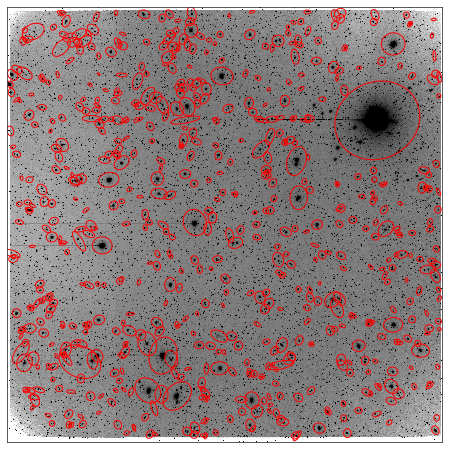

In [15]:
pipe.display_sources()